<a href="https://colab.research.google.com/github/arun-arunisto/OpenCVTutorialAbel/blob/main/ObjectDetectionUsingTFModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#class labels
class_file = "/content/drive/MyDrive/AbelFolder/ttfmodelandclasslabel/coco_class_labels.txt"

In [5]:
with open(class_file) as fp:
  labels = fp.read().split("\n")
print(labels)

['unlabeled', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush', '']


In [6]:
#loading the tensorflow model
model_file = "/content/drive/MyDrive/AbelFolder/ttfmodelandclasslabel/ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb"
config_file = "/content/drive/MyDrive/AbelFolder/ttfmodelandclasslabel/ssd_mobilenet_v2_coco_2018_03_29.pbtxt"

In [7]:
#load the tensorflow model
net = cv2.dnn.readNetFromTensorflow(model_file, config_file)

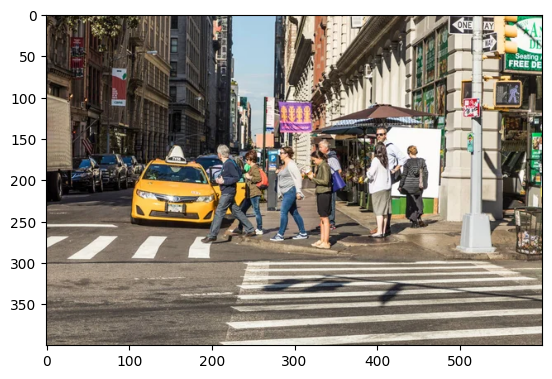

In [8]:
image = cv2.imread("/content/drive/MyDrive/AbelFolder/ttfmodelandclasslabel/traffic_image.jpg")
plt.imshow(image[:, :, ::-1])

In [9]:
#detecting the objects
blob = cv2.dnn.blobFromImage(image, 1.0, size=(300, 300), mean=(0, 0, 0), swapRB=True, crop=False)

In [10]:
net.setInput(blob)

In [11]:
#detect objects
objects = net.forward()

In [12]:
objects

array([[[[ 0.00000000e+00,  1.00000000e+00,  9.11873519e-01,
           3.48691434e-01,  4.14029241e-01,  4.28513914e-01,
           6.80908799e-01],
         [ 0.00000000e+00,  1.00000000e+00,  8.48651290e-01,
           4.46897149e-01,  4.06945467e-01,  5.28718889e-01,
           6.89901352e-01],
         [ 0.00000000e+00,  1.00000000e+00,  7.48887360e-01,
           5.31742752e-01,  3.96159559e-01,  5.91887653e-01,
           7.00122476e-01],
         [ 0.00000000e+00,  3.00000000e+00,  7.30339825e-01,
           1.64489761e-01,  4.30896401e-01,  3.49844038e-01,
           6.48748040e-01],
         [ 0.00000000e+00,  3.00000000e+00,  7.14263380e-01,
           6.76496029e-02,  4.23298448e-01,  1.72760770e-01,
           5.34982443e-01],
         [ 0.00000000e+00,  1.00000000e+00,  7.10578501e-01,
           3.28504384e-01,  4.05334055e-01,  4.08395290e-01,
           6.79890215e-01],
         [ 0.00000000e+00,  1.00000000e+00,  7.03577578e-01,
           6.38934314e-01,  4.00857866e

In [13]:
objects.shape

(1, 1, 100, 7)

In [15]:
rows = image.shape[0]
cols = image.shape[1]

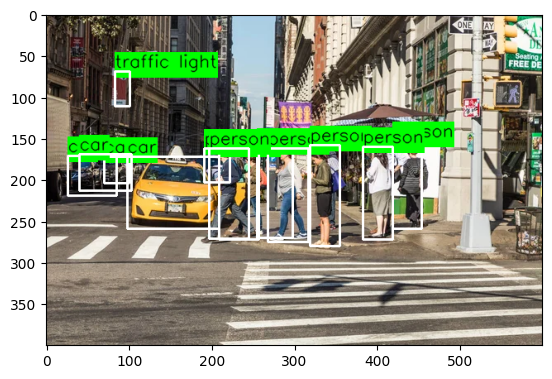

In [20]:
for i in range(objects.shape[2]):
  class_id = int(objects[0, 0, i, 1])
  score = float(objects[0, 0, i, 2])

  x = int(objects[0, 0, i, 3]*cols)
  y = int(objects[0, 0, i, 4]*rows)
  w = int(objects[0, 0, i, 5]*cols-x)
  h = int(objects[0, 0, i, 6]*rows-y)

  if score > 0.7:
    text_size = cv2.getTextSize(labels[class_id], cv2.FONT_HERSHEY_SIMPLEX, 0.7, 1)
    dim = text_size[0]
    baseline = text_size[1]
    cv2.rectangle(image, (x, y-dim[1]-baseline), (x+dim[0], y+baseline), (0, 255, 0), cv2.FILLED)
    cv2.putText(image, labels[class_id], (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 1, cv2.LINE_AA)
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 255), 2)

plt.imshow(image[:, :, ::-1])

In [21]:
#object detection
def detect_objects(image, net, labels):
  blob = cv2.dnn.blobFromImage(image, 1.0, size=(300, 300), mean=(0, 0, 0), swapRB=True, crop=False)
  net.setInput(blob)
  objects = net.forward()
  rows = image.shape[0]
  cols = image.shape[1]
  for i in range(objects.shape[2]):
    class_id = int(objects[0, 0, i, 1])
    score = float(objects[0, 0, i, 2])

    x = int(objects[0, 0, i, 3]*cols)
    y = int(objects[0, 0, i, 4]*rows)
    w = int(objects[0, 0, i, 5]*cols-x)
    h = int(objects[0, 0, i, 6]*rows-y)

    if score > 0.7:
      text_size = cv2.getTextSize(labels[class_id], cv2.FONT_HERSHEY_SIMPLEX, 0.7, 1)
      dim = text_size[0]
      baseline = text_size[1]
      cv2.rectangle(image, (x, y-dim[1]-baseline), (x+dim[0], y+baseline), (0, 255, 0), cv2.FILLED)
      cv2.putText(image, labels[class_id], (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 1, cv2.LINE_AA)
      cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 255), 2)

  plt.imshow(image[:, :, ::-1])

In [22]:
football_image = cv2.imread("/content/drive/MyDrive/AbelFolder/ttfmodelandclasslabel/football.png")

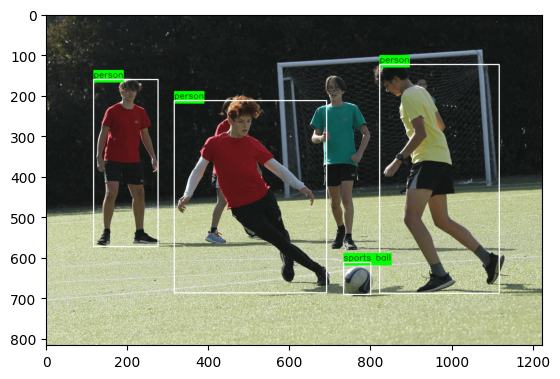

In [23]:
detect_objects(football_image, net, labels)